In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from statistics import mean
import matplotlib.patches as mpatches

df = pd.read_csv("master.csv")
df.tail()
%matplotlib inline

## Presentation of Static Visualisation
- Rationalize design choices
- Discuss technical implementation 
- Discuss the findings from the data and how the visualization communicates the findings


## Observing the nature of missing data
- HDI can be replaced with regression with GDP per capita, suicides, population
- Observe the FSTAT muna
- explore the use of forward fill, or mean replacement
- 19,456 MISSING cells on HDI_for_year

In [2]:
print(df.isnull().sum())
print(df.describe())

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k         0
country-year          0
HDI_for_year      19456
gdp_for_year          0
gdp_per_capita        0
generation            0
dtype: int64
               year   suicides_no    population  suicides/100k  HDI_for_year  \
count  27820.000000  27820.000000  2.782000e+04   27820.000000   8364.000000   
mean    2001.258375    242.574407  1.844794e+06      12.816097      0.776601   
std        8.469055    902.047917  3.911779e+06      18.961511      0.093367   
min     1985.000000      0.000000  2.780000e+02       0.000000      0.483000   
25%     1995.000000      3.000000  9.749850e+04       0.920000      0.713000   
50%     2002.000000     25.000000  4.301500e+05       5.990000      0.779000   
75%     2008.000000    131.000000  1.486143e+06      16.620000      0.855000   
max     2016.000000  22338.000000  4.380521e+07     224.970

# Adding the column total suicides and population per year for regression model

In [3]:
df['population_sum'] = 0
df['suicides_no_sum'] = 0

In [4]:
df1 = df.groupby(['country','year'])[['suicides_no','population']].sum().add_suffix('_sum')

for i in range(0, len(df)):
    c = df.iloc[i].country
    y = df.iloc[i].year
    t = df1.loc[c].loc[y]
    df.iloc[i, df.columns.get_loc('population_sum')] = t.population_sum
    df.iloc[i, df.columns.get_loc('suicides_no_sum')] = t.suicides_no_sum

## Used a simple linear regression model to predict missing 'HDI_for_year'
- Can get a rough estimate with respect to GDP, population, total suicides
- Show stat info, including fstat
- GDP PER CAPITA, SUICIDES, POPULATION = PREDICTED HDI

In [5]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

t = df[['gdp_per_capita','suicides_no_sum','population_sum','HDI_for_year']]

#Split data set to with missing and without

x_test = t[t['HDI_for_year'].isnull()].drop(columns='HDI_for_year')
y_test = t[t['HDI_for_year'].isnull()]['HDI_for_year']
x_train = t[t['HDI_for_year'].notnull()].drop(columns='HDI_for_year')
y_train = t[t['HDI_for_year'].notnull()]['HDI_for_year']

#train using linear regression

linreg.fit(x_train, y_train)

#predict the missing values which is x_test

predicted = linreg.predict(x_test)

#combine with target

t.HDI_for_year[t.HDI_for_year.isnull()] = predicted
t.info()

#replace column with new data
df['HDI_for_year'] = t['HDI_for_year']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 4 columns):
gdp_per_capita     27820 non-null int64
suicides_no_sum    27820 non-null int64
population_sum     27820 non-null int64
HDI_for_year       27820 non-null float64
dtypes: float64(1), int64(3)
memory usage: 869.5 KB


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
print(df.isnull().sum())
print(df.describe())

country            0
year               0
sex                0
age                0
suicides_no        0
population         0
suicides/100k      0
country-year       0
HDI_for_year       0
gdp_for_year       0
gdp_per_capita     0
generation         0
population_sum     0
suicides_no_sum    0
dtype: int64
               year   suicides_no    population  suicides/100k  HDI_for_year  \
count  27820.000000  27820.000000  2.782000e+04   27820.000000  27820.000000   
mean    2001.258375    242.574407  1.844794e+06      12.816097      0.765544   
std        8.469055    902.047917  3.911779e+06      18.961511      0.070550   
min     1985.000000      0.000000  2.780000e+02       0.000000      0.483000   
25%     1995.000000      3.000000  9.749850e+04       0.920000      0.719006   
50%     2002.000000     25.000000  4.301500e+05       5.990000      0.746000   
75%     2008.000000    131.000000  1.486143e+06      16.620000      0.807000   
max     2016.000000  22338.000000  4.380521e+07     2

## Research Question 1:
Are there any apparent patterns when it comes to the suicide rates throughout the different generations (Generation X, G.I. Generation, Boomers, etc.) across different countries?  

In [6]:
df2 = df[df["country"] == "United States"]

In [7]:
#top 10 http://statisticstimes.com/economy/world-gdp-ranking.php
#China should be 2nd, India should 9th, Russia should be 10th
top = ["United States", "Japan", "Germany", "United Kingdom", "France", "Brazil", "Italy", "Canada", "Australia"]
for i in top:
    if i == "United States":
        continue
    else:  
        hi = df[df["country"] == i]
        df2 = pd.concat([df2, hi])

In [8]:
df3 = df[df["country"] == "Palau"]

In [9]:
#bottom 10 http://statisticstimes.com/economy/world-gdp-ranking.php
#Palau should be 1st, Equatorial Guinea should be 6th, Slovak Republic should be 7th
bottom = ["Barbados", "Latvia", "Uruguay", "Lithuania","Oman", "Czech Republic", "Estonia","Trinidad and Tobago", "Greece", "Portugal"]
for i in bottom:
    if i == "Palau":
        continue
    else:  
        hi = df[df["country"] == i]
        df3 = pd.concat([df3, hi])

In [10]:
df3.country.unique()

array(['Barbados', 'Latvia', 'Uruguay', 'Lithuania', 'Oman',
       'Czech Republic', 'Estonia', 'Trinidad and Tobago', 'Greece',
       'Portugal'], dtype=object)

In [12]:
df2.to_csv('top.csv')
df3.to_csv('bottom.csv')
df.to_csv('main.csv')

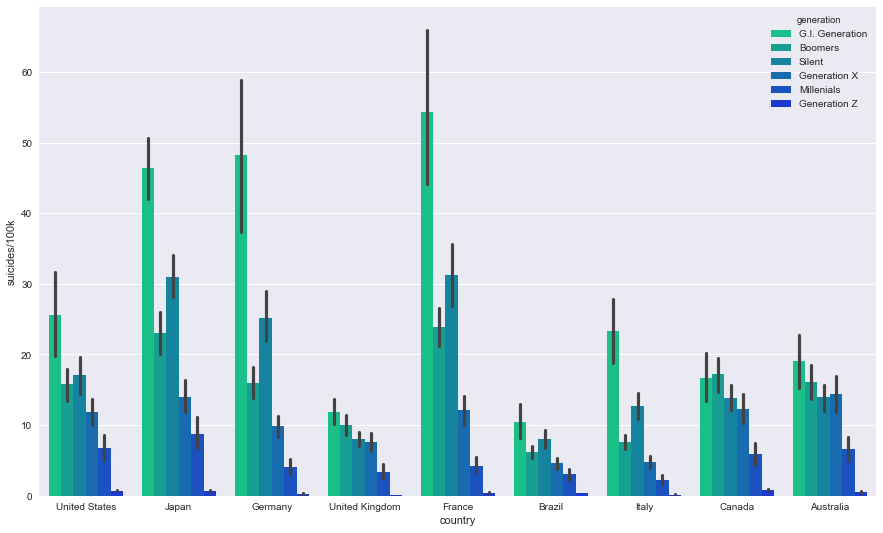

In [14]:
sns.barplot(x = 'country', y = 'suicides/100k', data = df2, hue = 'generation', palette = 'winter_r')
sns.set(rc={'figure.figsize':(15,9)})

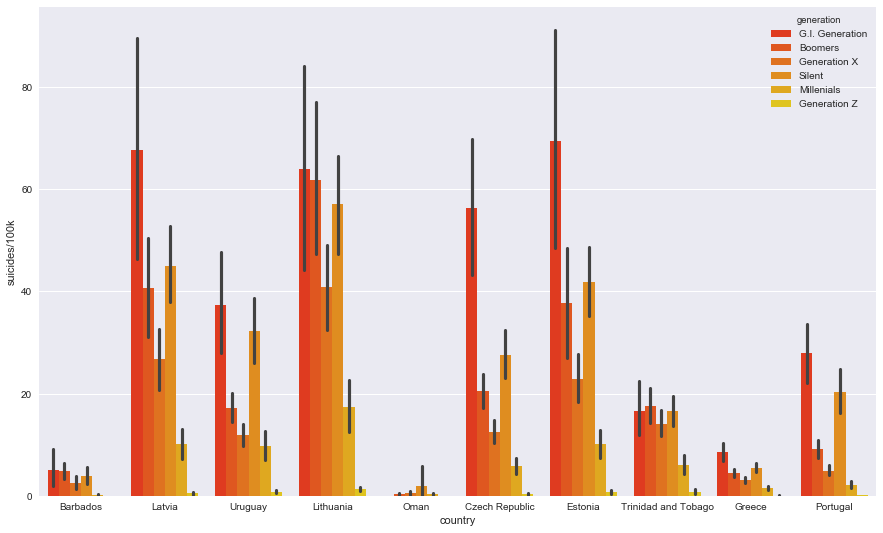

In [13]:
sns.barplot(x = 'country', y = 'suicides/100k', data = df3, hue = 'generation', palette = 'autumn')
sns.set(rc={'figure.figsize':(15,9)})

## Research Question 2:
Is there a relationship between a country’s Gross Domestic Product and its suicide rate?

In [15]:
df

,country,year,sex,age,suicides_no,population,suicides/100k,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation,population_sum,suicides_no_sum
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.711059,"2,156,624,900",796,Generation X,2709600,73
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.711059,"2,156,624,900",796,Silent,2709600,73
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.711059,"2,156,624,900",796,Generation X,2709600,73
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.711059,"2,156,624,900",796,G.I. Generation,2709600,73
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.711059,"2,156,624,900",796,Boomers,2709600,73
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,0.711059,"2,156,624,900",796,G.I. Generation,2709600,73
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,0.711059,"2,156,624,900",796,Silent,2709600,73
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,0.711059,"2,156,624,900",796,Boomers,2709600,73
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,0.711059,"2,156,624,900",796,G.I. Generation,2709600,73
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,0.711059,"2,156,624,900",796,Generation X,2709600,73


In [16]:
#reduced data to 2000s
df4 = df[(df.year >= 2000) & (df.year <= 2016)]
#identify top 5 countries with highest suicide rate
df5 = df4.groupby("country")["suicides/100k"].sum().sort_values(ascending=False).head(5)
df5

country
Lithuania             7660.64
Republic of Korea     6824.38
Russian Federation    6016.94
Hungary               5568.46
Kazakhstan            5562.54
Name: suicides/100k, dtype: float64

In [17]:
 df6 = df4[df4["country"] == "Lithuania"]

In [18]:
topsr = ["Lithuania","Republic of Korea", "Russian Federation", "Hungary","Kazakhstan"]
for i in topsr:
    if i == "Lithuania":
        continue
    else:  
        group = df4[df4["country"] == i]
        df6 = pd.concat([df6, group])

In [19]:
df6.country.unique()
df6

,country,year,sex,age,suicides_no,population,suicides/100k,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation,population_sum,suicides_no_sum
15104,Lithuania,2000,male,35-54 years,595,451103,131.90,Lithuania2000,0.754000,"11,539,211,480",3481,Boomers,3315125,1631
15105,Lithuania,2000,male,55-74 years,324,276055,117.37,Lithuania2000,0.754000,"11,539,211,480",3481,Silent,3315125,1631
15106,Lithuania,2000,male,25-34 years,221,249865,88.45,Lithuania2000,0.754000,"11,539,211,480",3481,Generation X,3315125,1631
15107,Lithuania,2000,male,75+ years,40,50557,79.12,Lithuania2000,0.754000,"11,539,211,480",3481,G.I. Generation,3315125,1631
15108,Lithuania,2000,male,15-24 years,131,252489,51.88,Lithuania2000,0.754000,"11,539,211,480",3481,Generation X,3315125,1631
15109,Lithuania,2000,female,75+ years,36,124608,28.89,Lithuania2000,0.754000,"11,539,211,480",3481,G.I. Generation,3315125,1631
15110,Lithuania,2000,female,55-74 years,101,405061,24.93,Lithuania2000,0.754000,"11,539,211,480",3481,Silent,3315125,1631
15111,Lithuania,2000,female,35-54 years,121,493992,24.49,Lithuania2000,0.754000,"11,539,211,480",3481,Boomers,3315125,1631
15112,Lithuania,2000,female,25-34 years,31,252324,12.29,Lithuania2000,0.754000,"11,539,211,480",3481,Generation X,3315125,1631
15113,Lithuania,2000,female,15-24 years,25,245035,10.20,Lithuania2000,0.754000,"11,539,211,480",3481,Generation X,3315125,1631


In [20]:
# df6.rename(columns={'suicides/100k':'sr'}, inplace=True)
# df6.rename(columns={'gdp_per_capita':'gdp'}, inplace=True)

(0, 60)

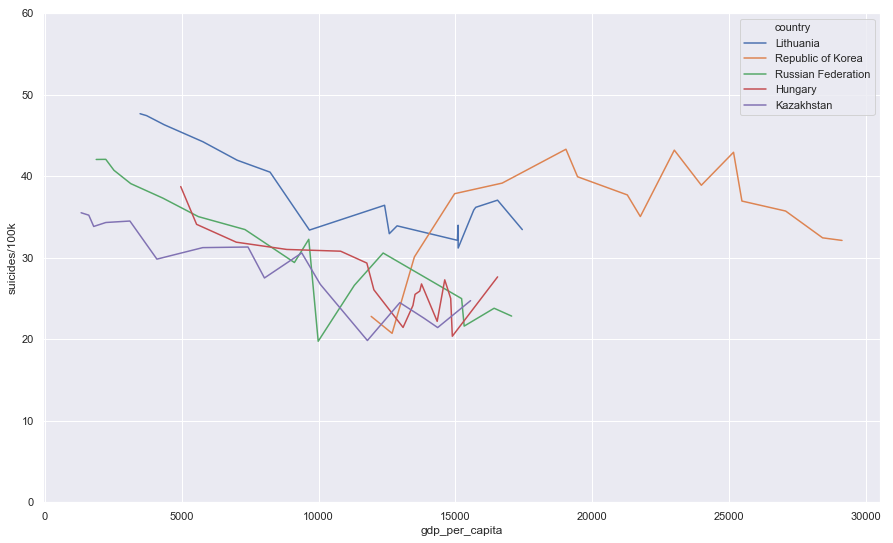

In [27]:
sns.lineplot(data=df6, x='gdp_per_capita', y='suicides/100k', hue='country',ci=None) 
plt.ylim(0,60)